### Biblioteki używane w rozwiązaniach zadań

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from functools import cache

# Zadanie 1

Poniżej funkcja obliczająca pierwsze 3 pochodne $tan(x)$ - będzie ona przydatna w tym zadaniu.

In [11]:
def nth_tan_derivative(n, x = 1):
    fst = 1 + np.tan(x)**2
    snd = 2 * np.tan(x) * fst
    thd = 2 * fst + 6*fst*np.tan(x)**2
    match n:
        case 1: return fst
        case 2: return snd
        case 3: return thd

Otrzymane wartości 2 i 3 pochodnej tangensa dla $x =  1$.

In [12]:
nth_tan_derivative(2)

10.669858944975319

In [13]:
nth_tan_derivative(3)

56.70299986727782

## Podejście pierwsze - różnica prawostronna

Wzór na różnicę prawostronną (*forward*):

In [14]:
def f_derivative_forward(f, x, h_values):
    return (f(x + h_values) - f(x)) / h_values

Sprawdzamy działanie programu dla funkcji tan(*x*) oraz *x* = 1. Wyznaczymy wartości błędu metody, błędu numerycznego i błędu obliczeniowego w zależności od *h*, dla *h* = 10<sup>-k</sup>, ```k = 0, 1,..., 16```, korzystając z tożsamości tan'(*x*) = 1 + tan<sup>2</sup>(*x*).

In [15]:
#given information
h_values = np.array([10**(-k) for k in range(17)])
x = 1
r_val = 1 + np.tan(x)**2

Poniżej znajduja się obliczenia błędów.

In [16]:
#computed values and computational error
comp_values = f_derivative_forward(np.tan, x, h_values)
ce_values = np.abs(comp_values - r_val)

#truncation error
M = nth_tan_derivative(2) #M is an estimated absolute value of second derivative for x=1
te_values = M * h_values / 2

#numerical (rounding) error
epsilon = np.finfo(np.float64).eps
ne_values = 2 * epsilon / h_values

Przedstawmy to na wspólnym wykresie.

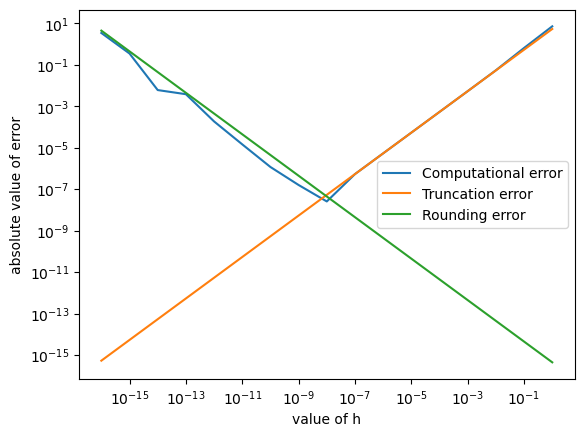

In [17]:
plt.yscale("log")
plt.xscale("log")
plt.plot(h_values, ce_values, label = 'Computational error')
plt.plot(h_values, te_values, label = 'Truncation error')
plt.plot(h_values, ne_values, label = 'Rounding error')
plt.xlabel("value of h")
plt.ylabel("absolute value of error")
plt.legend()
plt.show()

Z wykresu można odczytać punkt, w którym błąd obliczeniowy ma najmniejszą wartość, ale nie jest to wartość dokładna ze względu na uproszczenie wykresu. Obliczmy tę wartość ze wzoru $h_{min}=2\sqrt{\frac{\epsilon}{M}}$.

In [18]:
h_min = 2 * (epsilon / M)**0.5
print(h_min)

9.123695225180451e-09


Obliczamy wartość bezwzględną błędu względnego w wyznaczonym punkcie.

In [20]:
h_value = np.array([h_min])
print(np.abs((f_derivative_forward(np.tan, x, h_value) - r_val) / r_val))

[5.33866349e-09]


## Podejście drugie - różnica centralna

Wzór na różnicę centralną (*central*):

In [21]:
def f_derivative_central(f, x, h_values):
    return (f(x + h_values) - f(x - h_values)) / (2 * h_values)

Postępujemy analogicznie jak wcześniej, ale tym razem użyjemy wzoru różnic centralnych do obliczenia pochodnej i na podstawie tego wyznaczymy błędy obliczeniowe. Zależności, z których obliczymy błędy metody i błędy numeryczne są przy tym podejściu wyrażone innymi wzorami.

In [22]:
#computed values and computational error
comp_values = f_derivative_central(np.tan, x, h_values)
ce_values = np.abs(comp_values - r_val)

#truncation error
M = nth_tan_derivative(3) #M is an estimated absolute value of third derivative for x=1
te_values = M * h_values**2 / 6

#numerical (rounding) error
ne_values = epsilon / h_values

Przedstawmy to na wspólnym wykresie.

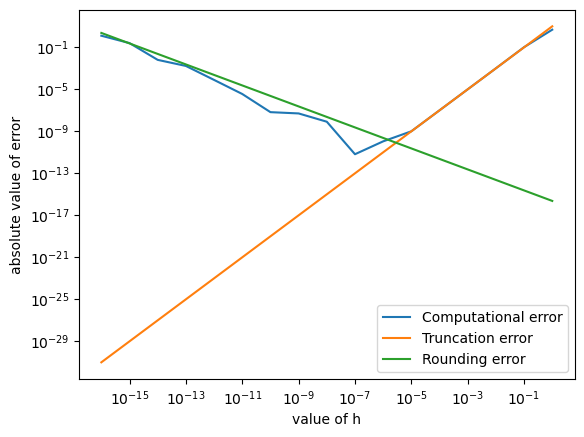

In [23]:
plt.yscale("log")
plt.xscale("log")
plt.plot(h_values, ce_values, label = 'Computational error')
plt.plot(h_values, te_values, label = 'Truncation error')
plt.plot(h_values, ne_values, label = 'Rounding error')
plt.xlabel("value of h")
plt.ylabel("absolute value of error")
plt.legend()
plt.show()

Z wykresu można odczytać punkt, w którym błąd obliczeniowy ma najmniejszą wartość, ale nie jest to wartość dokładna ze względu na uproszczenie wykresu. Tym razem obliczamy tę wartość ze wzoru $h_{min}=\sqrt[3]{\frac{3\epsilon}{M}}$.

In [24]:
h_min = (3 * epsilon / M)**(1/3)
print(h_min)

2.2732741568390634e-06


Obliczamy wartość bezwzględną błędu względnego w wyznaczonym punkcie.

In [25]:
h_value = np.array([h_min])
print(np.abs((f_derivative_central(np.tan, x, h_value) - r_val) / r_val))

[2.53340126e-11]


# Zadanie 2

Zgodnie z poleceniem zadania, ciąg jest zdefiniowany nastepująco.

In [34]:
@cache
def sequence(n, func):
    if n==0: return func(1/3)
    if n==1: return func(1/12)
    return func(func(2.25)*sequence(n-1, func) - func(0.5)*sequence(n-2, func))
    
vseq = np.vectorize(sequence)

Poniżej alternatywna definicja, ale nie obkładamy współczynników równania funkcją *func* - da to interesujący wynik dla reprezentacji float32.

In [35]:
@cache
def sequence_without_coeff_approx(n, func):
    if n==0: return func(1/3)
    if n==1: return func(1/12)
    return func(2.25*sequence_without_coeff_approx(n-1, func) - 0.5*sequence_without_coeff_approx(n-2, func))
    
vseq_without_coeff_approx = np.vectorize(sequence_without_coeff_approx)

Poniżej obliczamy wyrazy tego ciągu:
- używając pojedynczej precyzji oraz przyjmując *n* = 225
- używając podwójnej precyzji oraz przyjmując *n* = 60
- używając reprezentacji z biblioteki **fractions** oraz przyjmując *n* = 225.

Dokładne rozwiązanie równania jest wyrażone wzorem $x_k=\frac{4^{-k}}{3}$.

In [36]:
@cache
def value_of_sequence(k): return 4**(-k)/3
seq = np.vectorize(value_of_sequence)
seq1 = seq(range(226))
seq2 = seq(range(61))

In [37]:
fst = vseq(range(0,226), np.float32)
fst_without_coeff_approx = vseq_without_coeff_approx(range(0, 226), np.float32)
snd = vseq(range(0,61), np.float64)
fractions = vseq(range(0, 226), Fraction)

/tmp/ipykernel_5409/2312798437.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return func(func(2.25)*sequence(n-1, func) - func(0.5)*sequence(n-2, func))
/tmp/ipykernel_5409/2312798437.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return func(func(2.25)*sequence(n-1, func) - func(0.5)*sequence(n-2, func))


 Następnie wyznaczymy wartości bezwględne błędów względnych w zależności od k, ```k = 0, 1,..., n```.

In [38]:
err_fst = np.abs(fst - seq1) / seq1
err_snd = np.abs(snd - seq2) /seq2
err_fractions = np.abs(fractions - seq1) / seq1

## Wykresy

Poniżej wykresy obliczonych wartości ciągu w zależności od *k*.

[]

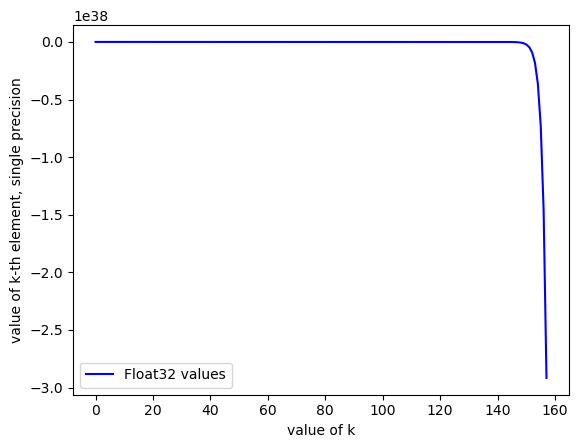

In [39]:
plt.plot(fst, color = "blue", label = "Float32 values")
plt.legend()
plt.xlabel("value of k")
plt.ylabel("value of k-th element, single precision")
plt.plot()

In [40]:
# Pierwszy element < 0. Po nim ciąg jest stale malejący < 0.
np.where(fst < 0)[0][0]

10

In [41]:
# Pierwszy element == -inf. Po nim ciąg przyjmuje wartości nieokreślone (-inf lub nan).
np.where(fst == -np.inf)[0][0]

158

In [42]:
# Pierwszy element == nan. Po nim ciąg przyjmuje wartości nieokreślone nan.
np.where(np.isnan(fst))[0][0]

160

Teraz spójrzmy na wykres w drugim wariancie, gdy nie używamy *np.float32* na współczynnikach wyrazów ciągu.

[]

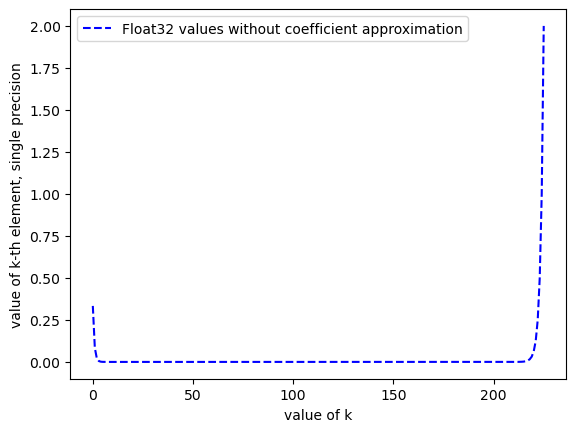

In [43]:
plt.plot(fst_without_coeff_approx, color = "blue", label = "Float32 values without coefficient approximation", linestyle='--')
plt.legend()
plt.xlabel("value of k")
plt.ylabel("value of k-th element, single precision")
plt.plot()

W celach porównawczych, będziemy jednak konsekwentnie stosować jednolity sposób obliczeń, tzn. działamy funkcją także na współczynniki w równaniu ciągu oraz obkładamy obliczone wyrazy wartością bezwzględną - przedstawiamy wyniki dla różnych reprezentacji.

[]

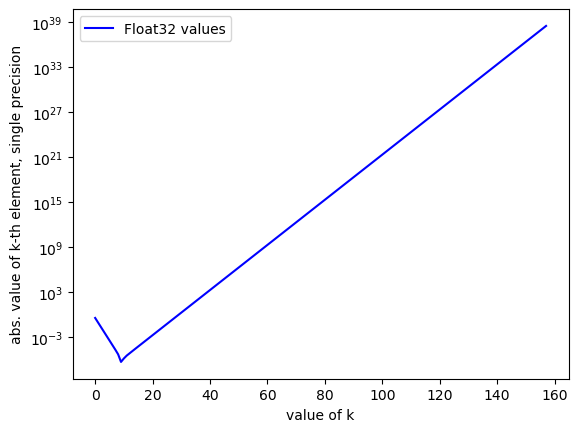

In [44]:
plt.semilogy(np.abs(fst), color = "blue", label = "Float32 values")
plt.legend()
plt.xlabel("value of k")
plt.ylabel("abs. value of k-th element, single precision")
plt.plot()

[]

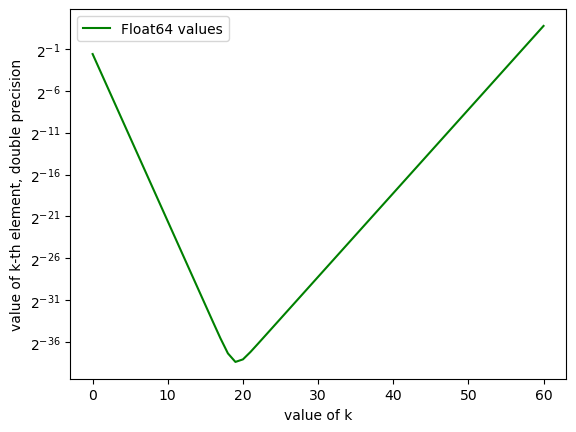

In [45]:
plt.semilogy(snd, base = 2, color = "green", label = "Float64 values")
plt.legend()
plt.xlabel("value of k")
plt.ylabel("value of k-th element, double precision")
plt.plot()

[]

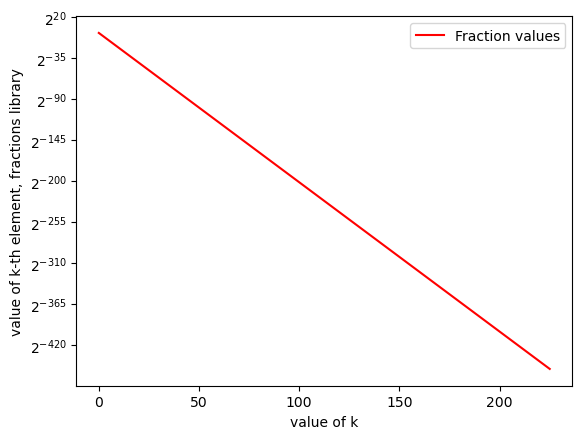

In [46]:
plt.semilogy(fractions, base = 2, color = "red", label = "Fraction values")
plt.legend()
plt.xlabel("value of k")
plt.ylabel("value of k-th element, fractions library")
plt.plot()

[]

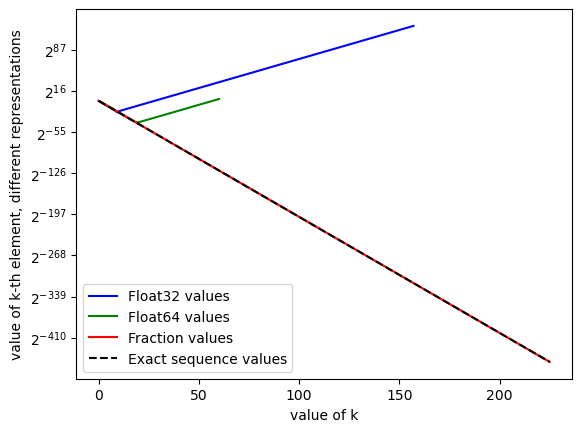

In [47]:
plt.semilogy(np.abs(fst), base = 2, color = "blue", label = "Float32 values")
plt.semilogy(snd, base = 2, color = "green", label = "Float64 values")
plt.semilogy(fractions, base = 2, color = "red", label = "Fraction values")
plt.semilogy(seq1, base = 2, color = "black", label = "Exact sequence values", linestyle='--')

plt.legend()
plt.xlabel("value of k")
plt.ylabel("value of k-th element, different representations")
plt.plot()

### Wartość bezwględna błędu względnego

Poniżej wykresy przedstawiające wartości bezwględne błędów względnych dla różnych reprezentacji w zależności od *k*.

[]

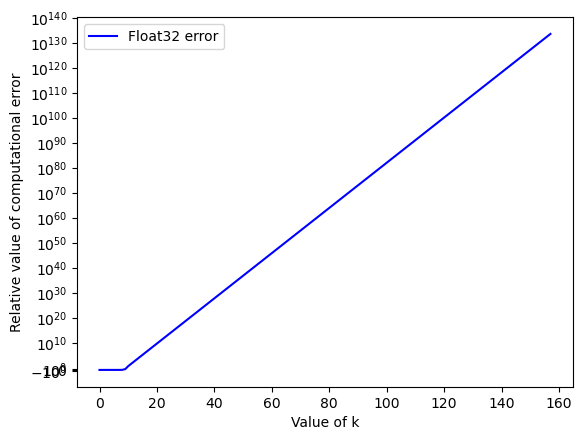

In [48]:
plt.yscale('symlog')
plt.plot(err_fst, color = "blue", label = "Float32 error")
plt.xlabel("Value of k")
plt.ylabel("Relative value of computational error")
plt.legend()
plt.plot()

[]

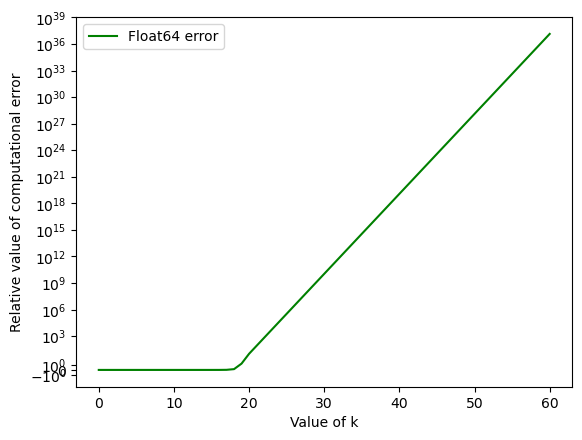

In [49]:
plt.yscale('symlog')
plt.plot(err_snd, color = "green", label = "Float64 error")
plt.xlabel("Value of k")
plt.ylabel("Relative value of computational error")
plt.legend()
plt.plot()

[]

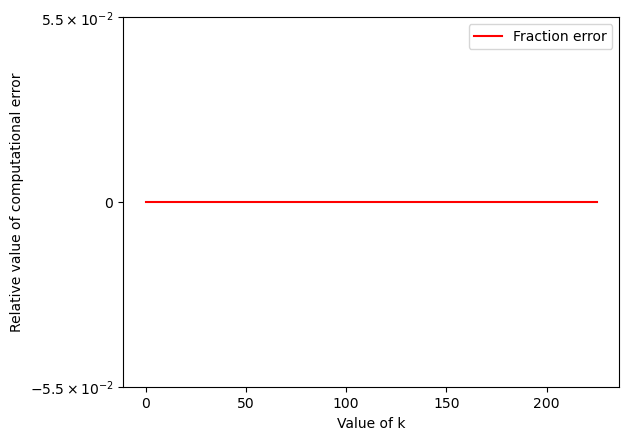

In [50]:
plt.yscale('symlog')
plt.plot(err_fractions, color = "red", label = "Fraction error")
plt.xlabel("Value of k")
plt.ylabel("Relative value of computational error")
plt.legend()
plt.plot()

[]

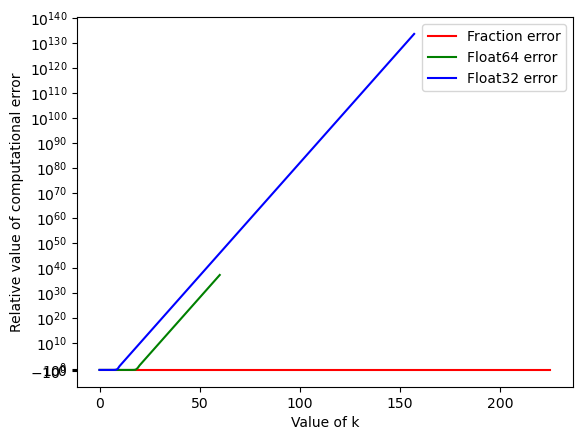

In [51]:
plt.yscale('symlog')
plt.plot(err_fractions, color = "red", label = "Fraction error")
plt.plot(err_snd, color = "green", label = "Float64 error")
plt.plot(err_fst, color = "blue", label = "Float32 error")
plt.xlabel("Value of k")
plt.ylabel("Relative value of computational error")
plt.legend()
plt.plot()

[]

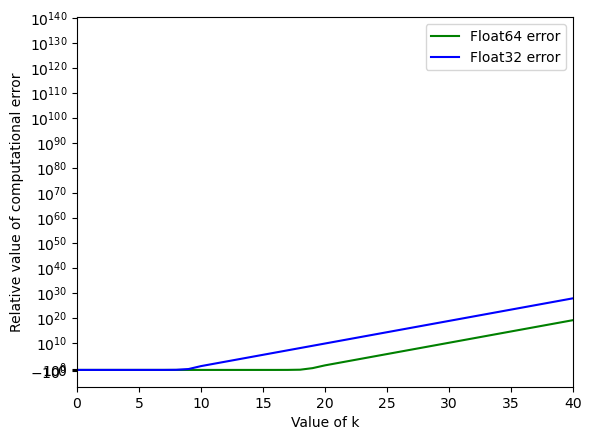

In [52]:
plt.yscale('symlog')
plt.plot(err_snd, color = "green", label = "Float64 error")
plt.plot(err_fst, color = "blue", label = "Float32 error")
plt.xlabel("Value of k")
plt.ylabel("Relative value of computational error")
plt.legend()
plt.xlim(0, 40)
plt.plot()

### Indeksy wartości najbliżej 0 ciągu dla float32, float64, fractions

In [53]:
min(range(len(np.abs(fst))), key=np.abs(fst).__getitem__)

9

In [54]:
min(range(len(np.abs(snd))), key=np.abs(snd).__getitem__)

19

In [55]:
min(range(len(np.abs(fractions))), key=np.abs(fractions).__getitem__)

225

### Wartości minimalne

In [56]:
fst[9]

4.541307e-07

In [57]:
snd[19]

2.771793376831781e-12

In [58]:
fractions[-1]

Fraction(6004799503160661, 52374249726338269920211035149241586435466272736689036631732661889538140742474792878132321477214466514414186946040961136147476104734166288853256441430016)

In [59]:
6004799503160661/52374249726338269920211035149241586435466272736689036631732661889538140742474792878132321477214466514414186946040961136147476104734166288853256441430016

1.1465175223581164e-136